In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Data/SALARY_DATA_CLEANED.CSV")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_sal,sal_prom,State,IN_HEADQUARTERS,COMPANY_AGE,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,NY,1,22,1,0,0,0,1


In [4]:
df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer'  in title.lower():
        return 'data engineer' 
    elif 'analyst'  in title.lower():
        return 'analyst' 
    elif 'machine learning'  in title.lower():
        return 'analyst'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [6]:
df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.Job_simp.value_counts()

data scientist    279
analyst           124
data engineer     119
Name: Job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
df[df.State != ' Los Angeles'].State.value_counts()

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 CO     11
 DC     11
 UT     10
 WI     10
 IN     10
 AZ      9
 MO      9
 AL      8
 MI      6
 DE      6
 KY      6
 GA      6
 IA      5
 CT      5
 LA      4
 OR      4
 NE      4
 KS      3
 NM      3
 MN      2
 ID      2
 SC      1
 RI      1
Name: State, dtype: int64

In [11]:
#Fix Los Angeles State

df.State.value_counts()
df['job_state'] = df.State.apply(lambda x: x if x != ' Los Angeles' else 'CA')
df.job_state.value_counts()

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 WA     21
 NC     21
 NJ     17
 FL     16
 OH     14
 TN     13
 CO     11
 DC     11
 WI     10
 IN     10
 UT     10
 AZ      9
 MO      9
 AL      8
 DE      6
 GA      6
 KY      6
 MI      6
 IA      5
 CT      5
 LA      4
 OR      4
 NE      4
 KS      3
 NM      3
 MN      2
 ID      2
CA       1
 SC      1
 RI      1
Name: job_state, dtype: int64

In [12]:
# Job Description Lenght

#Agregar una columna que incluya la extension de la descripcion

df['Descr_len'] = df['Job Description'].apply(lambda x: len(x))
df['Descr_len'] 

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: Descr_len, Length: 742, dtype: int64

In [13]:
# Competitors
df['N_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['N_Competitors'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: N_Competitors, dtype: int64

## Exploratory Analysis




In [14]:
df.describe()

,Rating,Founded,Hourly,Employer_provided,min_sal,max_sal,sal_prom,IN_HEADQUARTERS,COMPANY_AGE,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN,Descr_len,N_Competitors
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,74.068733,127.183288,100.626011,0.557951,46.659030,0.528302,0.129380,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.0,31.869282,46.909006,38.855948,0.496965,53.719654,0.499535,0.335846,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.0,10.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [15]:
# Create Histograms for most of the relevant features

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_sal', 'max_sal', 'sal_prom',
       'State', 'IN_HEADQUARTERS', 'COMPANY_AGE', 'PYTHON_YN', 'R_YN',
       'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'Job_simp', 'seniority', 'job_state',
       'Descr_len', 'N_Competitors'],
      dtype='object')

### Numerical Variables

<AxesSubplot:>

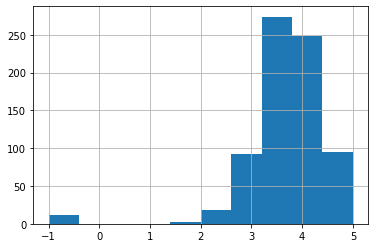

In [16]:
df.Rating.hist()


<AxesSubplot:>

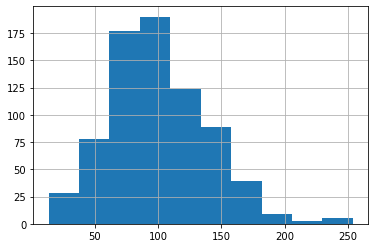

In [17]:
df.sal_prom.hist()

<AxesSubplot:>

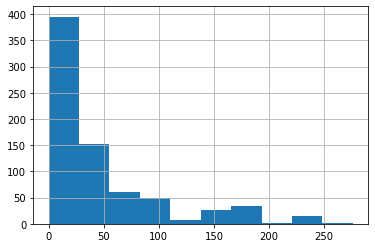

In [18]:
df.COMPANY_AGE.hist()

<AxesSubplot:>

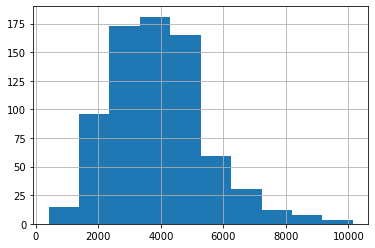

In [19]:
df.Descr_len.hist()

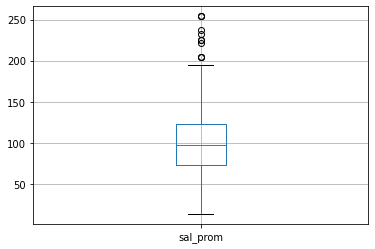

In [20]:
bloxplot = df.boxplot(['sal_prom'])

In [21]:
df[['COMPANY_AGE','sal_prom','Rating', 'Descr_len']].corr()

,COMPANY_AGE,sal_prom,Rating,Descr_len
COMPANY_AGE,1.000000,0.019736,0.020145,0.164815
sal_prom,0.019736,1.000000,0.013492,0.078093
Rating,0.020145,0.013492,1.000000,-0.012631
Descr_len,0.164815,0.078093,-0.012631,1.000000


<AxesSubplot:>

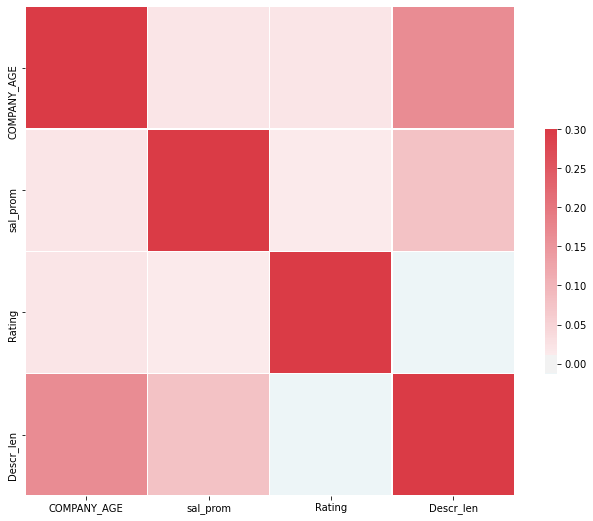

In [22]:

# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Mapa de correlación en seaborn



f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df[['COMPANY_AGE','sal_prom','Rating', 'Descr_len']].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Categorical Variables

In [23]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_sal', 'max_sal', 'sal_prom',
       'State', 'IN_HEADQUARTERS', 'COMPANY_AGE', 'PYTHON_YN', 'R_YN',
       'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'Job_simp', 'seniority', 'job_state',
       'Descr_len', 'N_Competitors'],
      dtype='object')

In [24]:
df_cat = df[['Location' , 'Headquarters' , 'Size' ,'Type of ownership', 'Industry', 'Sector', 'Revenue','Company Name' , 'State' ,  'PYTHON_YN', 'R_YN',
       'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'Job_simp', 'seniority', 'job_state' ]]

In [25]:
df['Size'] = df['Size'].apply(lambda x: 0 if x == -1 else x) 
df['Size'] = df['Size'].apply(lambda x: 0 if x == 'Unknown' else x) 

In [26]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
0                            9
-1                           1
Name: Size, dtype: int64

graph for Location: total = 200


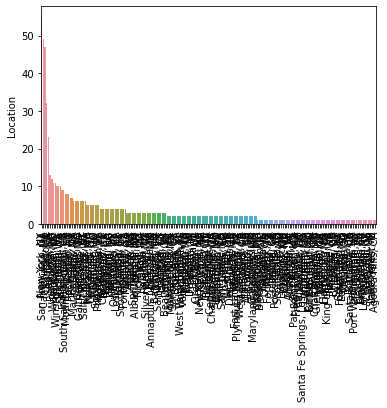

graph for Headquarters: total = 198


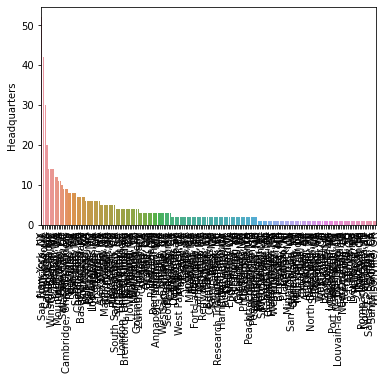

graph for Size: total = 9


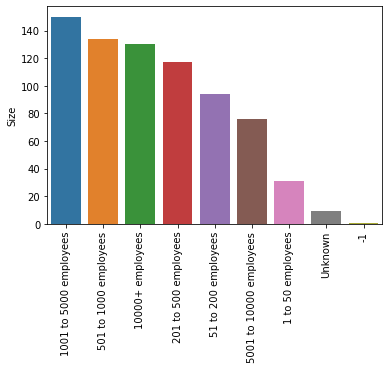

graph for Type of ownership: total = 11


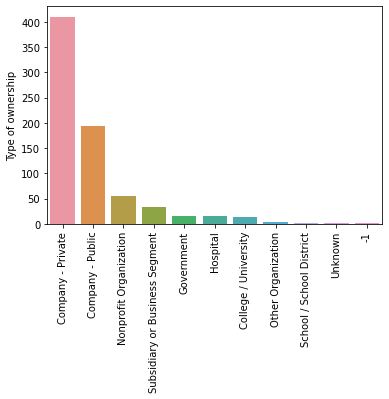

graph for Industry: total = 60


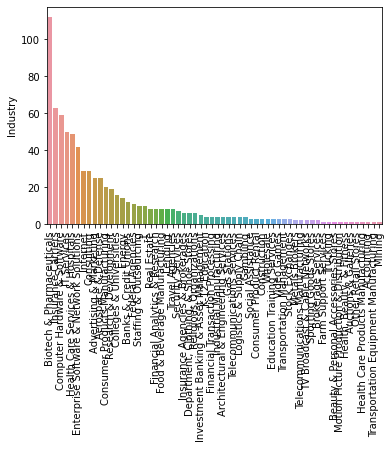

graph for Sector: total = 25


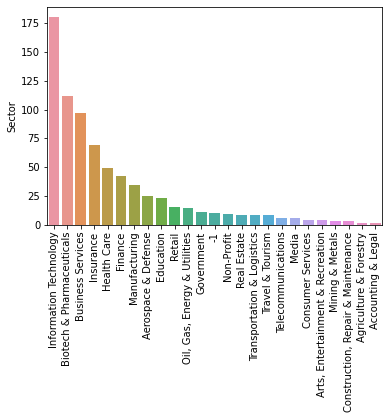

graph for Revenue: total = 14


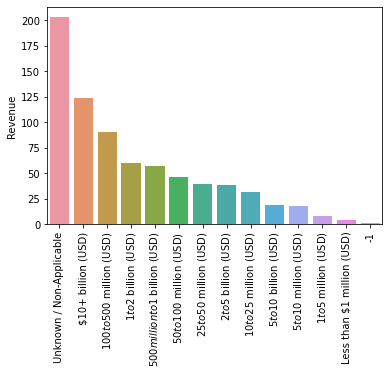

graph for Company Name: total = 343


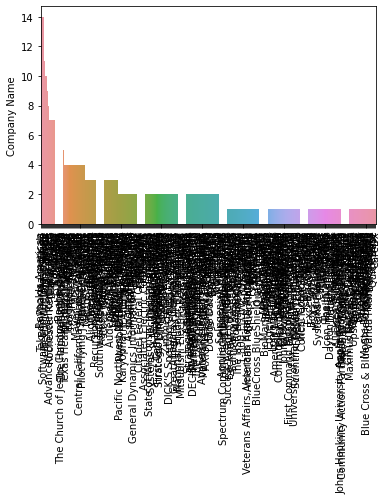

graph for State: total = 38


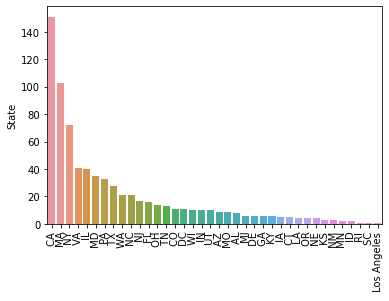

graph for PYTHON_YN: total = 2


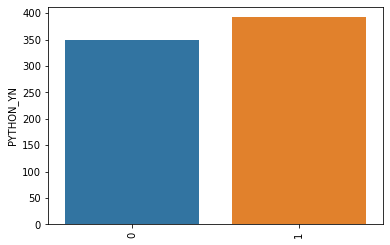

graph for R_YN: total = 2


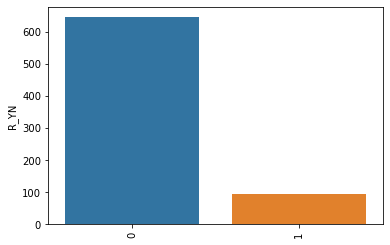

graph for SPARK_YN: total = 2


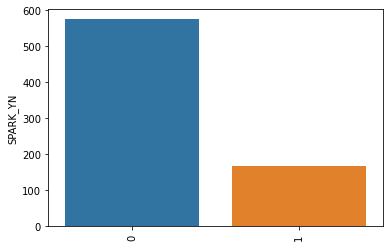

graph for AWS_YN: total = 2


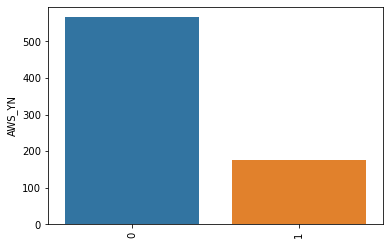

graph for EXCEL_YN: total = 2


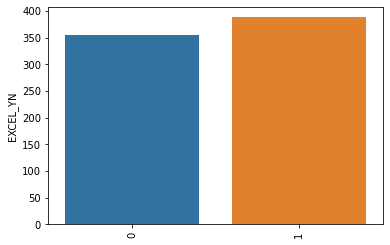

graph for Job_simp: total = 3


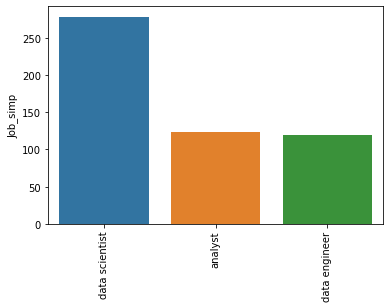

graph for seniority: total = 3


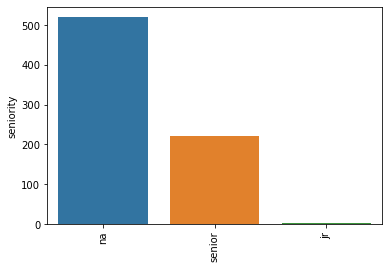

graph for job_state: total = 38


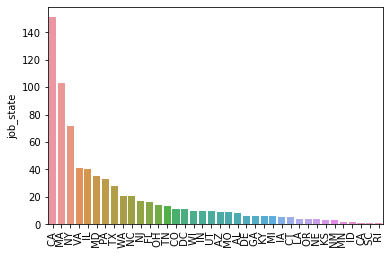

In [27]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)) )
    ax = sns.barplot(x= cat_num.index, y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


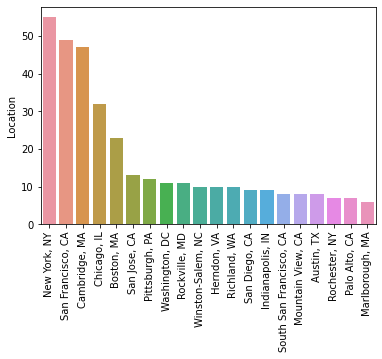

graph for Headquarters: total = 20


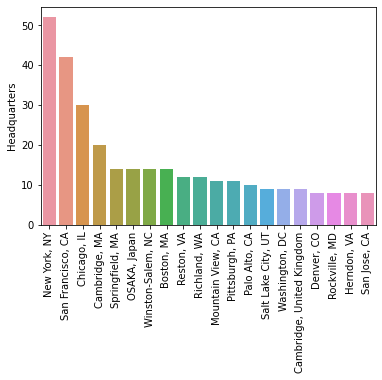

graph for Company Name: total = 20


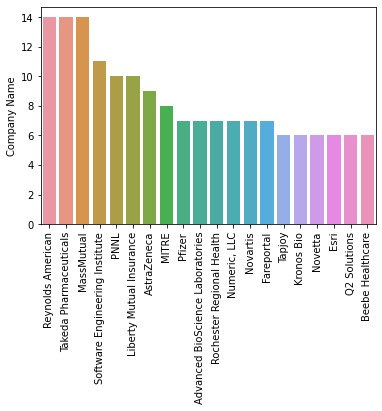

In [28]:
for i in df_cat[['Location' , 'Headquarters' , 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)) )
    ax = sns.barplot(x= cat_num.index, y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_sal', 'max_sal', 'sal_prom',
       'State', 'IN_HEADQUARTERS', 'COMPANY_AGE', 'PYTHON_YN', 'R_YN',
       'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'Job_simp', 'seniority', 'job_state',
       'Descr_len', 'N_Competitors'],
      dtype='object')

In [40]:
pd.set_option('display.max_rows' , None)

In [41]:
pd.pivot_table(df, index = ['Job_simp', 'seniority'], values = 'sal_prom')

sal_prom
Job_simp       seniority            
analyst        jr          56.500000
               na          70.926966
               senior      92.058824
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522

In [42]:
pd.pivot_table(df , index = ['Job_simp', 'seniority'] , values = 'sal_prom')

sal_prom
Job_simp       seniority            
analyst        jr          56.500000
               na          70.926966
               senior      92.058824
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522

In [43]:
pd.pivot_table(df , index = 'job_state', values = 'sal_prom').sort_values('sal_prom', ascending = False )

,sal_prom
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
CA,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [48]:
pd.pivot_table(df , index = ['job_state' , 'Job_simp'], values = 'sal_prom' , aggfunc = 'count').sort_values('job_state' )

sal_prom
job_state Job_simp                
 AL       analyst                5
          data engineer          1
 AZ       analyst                1
          data engineer          5
          data scientist         1
 CA       analyst               23
          data engineer         25
          data scientist        67
 CO       data scientist         3
          analyst                2
          data engineer          3
 CT       data scientist         2
 DC       analyst                2
          data engineer          4
          data scientist         5
 FL       data engineer          3
          analyst                6
          data scientist         7
 GA       data scientist         3
 IA       analyst                2
          data engineer          3
 ID       analyst                2
 IL       analyst                5
          data engineer          8
          data scientist        15
 IN       data engineer          4
          data scientist         2
 KS       analyst                3
 KY       data scientist         2
 LA       analyst                1
          data engineer          2
 MA       analyst                4
          data engineer         12
          data scientist        30
 MD       analyst                3
          data engineer          3
          data scientist        13
 MI       data scientist         4
 MN       analyst                1
          data engineer          1
 MO       analyst                2
          data scientist         3
 NC       data engineer          6
          data scientist         3
 NJ       data engineer          2
          data scientist         4
          analyst                6
 NM       data scientist         3
 NY       analyst               16
          data engineer          4
          data scientist        40
 OH       analyst                4
          data scientist         7
 OR       data scientist         3
          data engineer          1
 PA       data scientist         6
          data engineer          1
          analyst               15
 RI       analyst                1
 TN       analyst                2
          data engineer         10
          data scientist         1
 TX       data engineer          8
          data scientist        13
 UT       data scientist         3
          data engineer          3
          analyst                4
 VA       analyst                8
          data engineer         10
          data scientist        18
 WA       analyst                3
          data scientist        17
 WI       analyst                3
          data scientist         3
CA        data scientist         1

In [52]:
pd.pivot_table(df[df['Job_simp'] == 'data scientist'] , index = ['job_state' , 'Job_simp'], values = 'sal_prom').sort_values('sal_prom' , ascending = False )

,,sal_prom
job_state,Job_simp,
DC,data scientist,149.000000
CA,data scientist,143.044776
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [56]:
columnas = list(df.columns)
columnas

['Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors',
 'Hourly',
 'Employer_provided',
 'min_sal',
 'max_sal',
 'sal_prom',
 'State',
 'IN_HEADQUARTERS',
 'COMPANY_AGE',
 'PYTHON_YN',
 'R_YN',
 'SPARK_YN',
 'AWS_YN',
 'EXCEL_YN',
 'Job_simp',
 'seniority',
 'job_state',
 'Descr_len',
 'N_Competitors']

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'min_sal', 'max_sal', 'sal_prom',
       'State', 'IN_HEADQUARTERS', 'COMPANY_AGE', 'PYTHON_YN', 'R_YN',
       'SPARK_YN', 'AWS_YN', 'EXCEL_YN', 'Job_simp', 'seniority', 'job_state',
       'Descr_len', 'N_Competitors'],
      dtype='object')

In [72]:
df_pivots = df[['Rating' , 'Industry' , 'Sector' , 'Revenue' , 'N_Competitors' , 'Hourly' , 'Employer_provided' , 'PYTHON_YN', 'R_YN',
               'SPARK_YN', 'AWS_YN', 'EXCEL_YN' , 'Type of ownership' , 'sal_prom']]

In [77]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots , index = i , values = 'sal_prom').sort_values('sal_prom', ascending = False))

Rating
          sal_prom
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                            sal_prom
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'sal_prom' not 1-dimensional

## Word Cloud

## Segregación de los datos en Numéricos y categóricos

In [28]:
features_numerical = df.select_dtypes(exclude = ['object']).copy()
features_categorical = df.select_dtypes(include = ['object']).copy()

### Visualización

### Distribución univariada de caractertisticas

c:\users\pc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


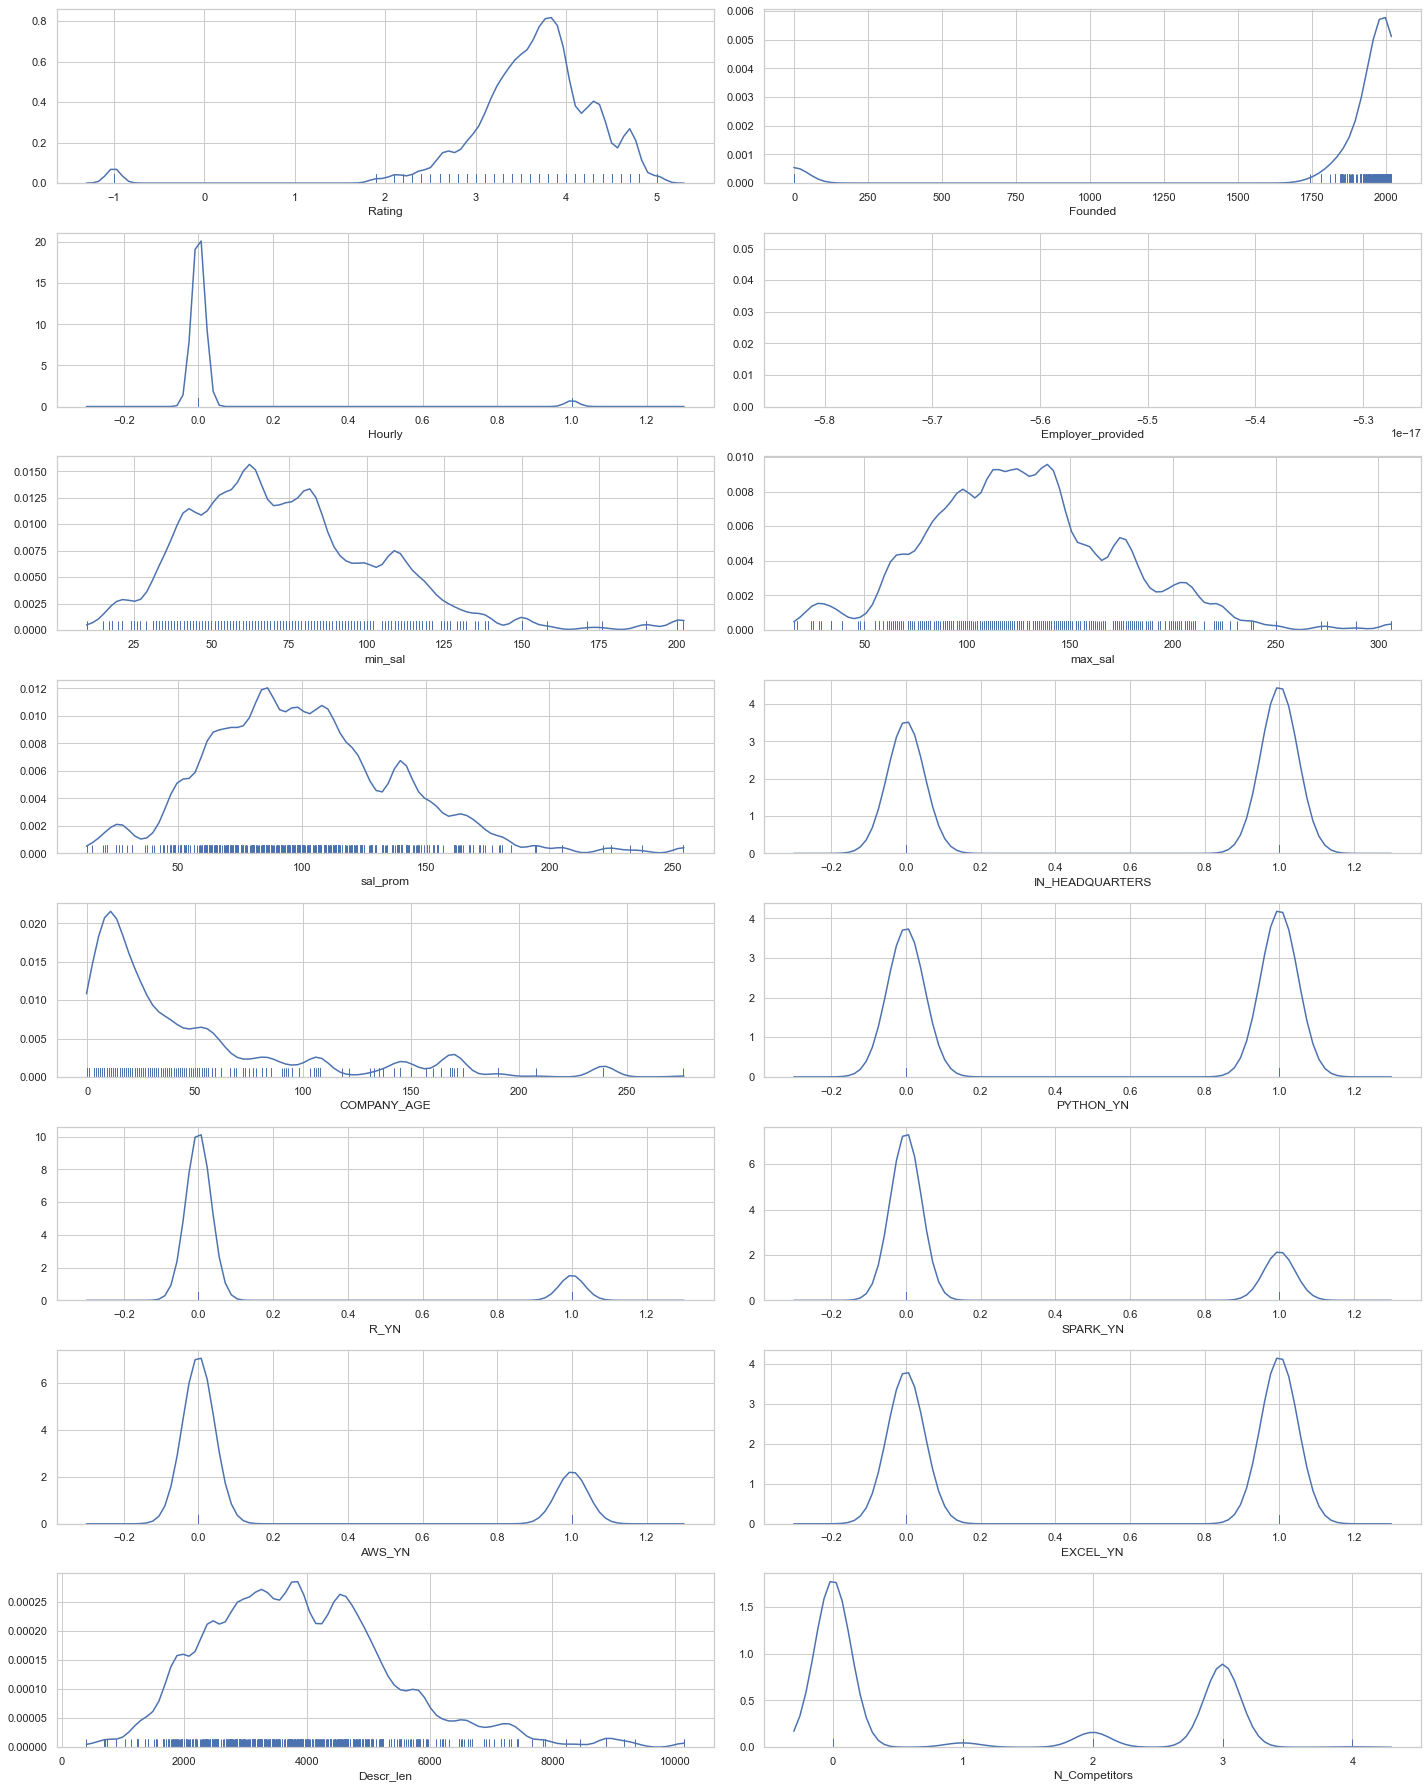

In [37]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range (len(features_numerical.columns)):
    fig.add_subplot(8,2, i+1)
    sns.distplot(features_numerical.iloc[:, i].dropna(), 
                rug = True, hist = False , 
                kde_kws = {'bw': 0.1} , color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()
            

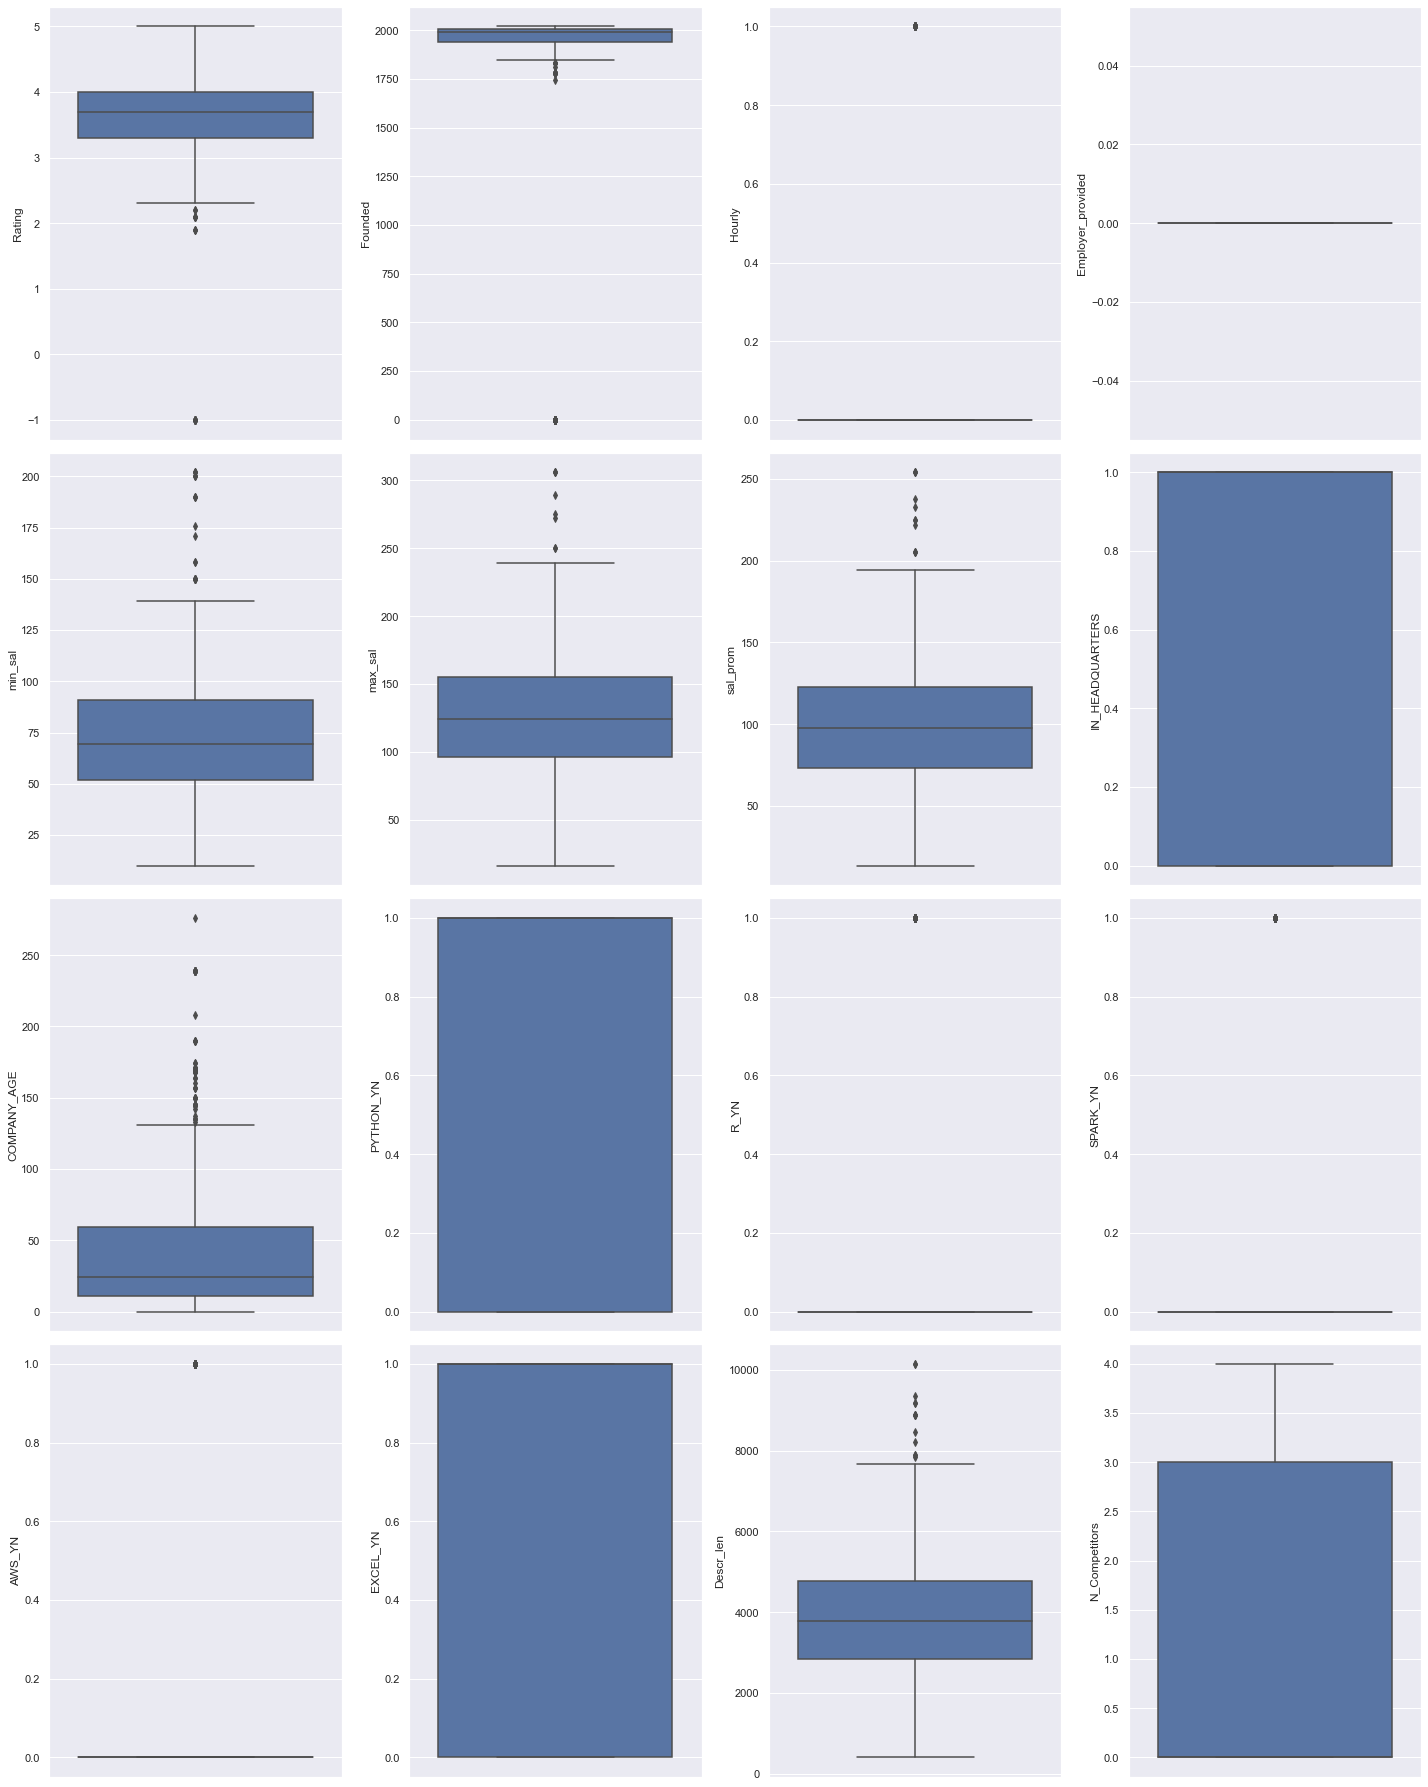

In [39]:

fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()